In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Part 1 - Data Preparation and Pre-processing

In [2]:
df = pd.read_csv("data.csv")
df.head()

C:\Users\Connor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
# Check for duplicates
df = df.drop('Id', axis=1)
df.duplicated().sum()

8607

In [4]:
# Remove Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
# Remove columns that wont be used in analysis
df = df.drop(['Title', 'Requirement', 'FullDescription'], axis=1)
df.head()

,Company,Date,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
0,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0,30,NaN
1,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN
2,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0,30,NaN
3,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN
4,Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0,30,NaN


In [6]:
# Check for null values
df.isnull().sum()

Company               11928
Date                      0
Location             113577
Area                 187763
Classification       113577
SubClassification    113577
LowestSalary              0
HighestSalary             0
JobType               15517
dtype: int64

In [7]:
# Remove entries with null values for critical columns
df = df.dropna(subset=['Date', 'LowestSalary', 'HighestSalary'])
df.isnull().sum()

Company               11928
Date                      0
Location             113577
Area                 187763
Classification       113577
SubClassification    113577
LowestSalary              0
HighestSalary             0
JobType               15517
dtype: int64

In [8]:
print(df.shape)
print(df.dtypes)

(309870, 9)
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


In [9]:
# Convert Date column to datetime
df['Date']= pd.to_datetime(df['Date'])
print(df.dtypes)

# Set index of the data to be date
df = df.set_index('Date')

Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object


In [10]:
# Add year and month columns
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Year_Month'] = df.index.to_period('M')

In [11]:
# Create extra column with average salary (combined lowest/highest)
df['AverageSalary'] = df[['LowestSalary','HighestSalary']].mean(axis=1)

# Create extra column with salary range (highest-lowest)
df['RangeSalary'] = df['HighestSalary'] - df['LowestSalary']

df.head()

,Company,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType,Year,Month,Day,Year_Month,AverageSalary,RangeSalary
Date,,,,,,,,,,,,,,
2018-10-07,Aldi Stores,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07,Aldi Stores,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07,LB Creative Pty Ltd,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07,Anaconda Group Pty Ltd,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07,Commonwealth Bank - Business & Private Banking,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0,30,NaN,2018,10,7,2018-10,15.0,30


# Part 2 - Data Analysis and Interpretation

## 2.1 - Metadata

In [12]:
df["AverageSalary"].describe()

count    309870.000000
mean         89.698403
std         108.555075
min          15.000000
25%          35.000000
50%          65.000000
75%         110.000000
max         599.500000
Name: AverageSalary, dtype: float64

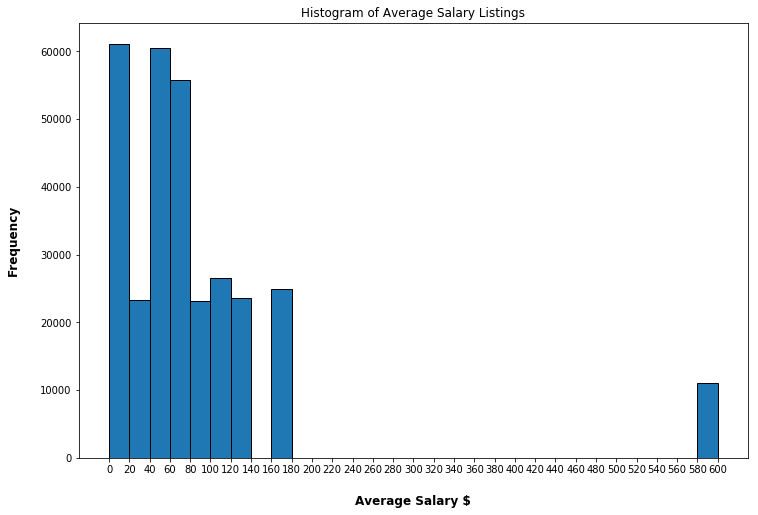

In [13]:
data = df['AverageSalary']
bins = np.arange(0, 601, step=20)
plt.figure(figsize=(12,8))
plt.hist(data, bins, edgecolor="k", alpha=1)
plt.xticks(bins)
plt.xlabel("Average Salary $", labelpad=20, weight='bold', size=12) 
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
plt.title("Histogram of Average Salary Listings")
plt.show()

### Outliers
Exploritory data analysis to work out why there are a high amount of outlier jobs paying $580-600

In [14]:
outliers = df[df['AverageSalary'] == 599.5]
outliers

,Company,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType,Year,Month,Day,Year_Month,AverageSalary,RangeSalary
Date,,,,,,,,,,,,,,
2018-10-05,AIMS International Executive Search,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05,AIMS International Executive Search,Brisbane,CBD & Inner Suburbs,CEO & General Management,COO & MD,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05,AIMS International Executive Search,Brisbane,CBD & Inner Suburbs,CEO & General Management,CEO,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-04,Hender Consulting,West Gippsland & Latrobe Valley,NaN,CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,4,2018-10,599.5,799
2018-10-04,Hender Consulting,Bairnsdale & Gippsland,NaN,CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,4,2018-10,599.5,799
2018-10-04,Hender Consulting,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,4,2018-10,599.5,799
2018-10-05,Hender Consulting,Adelaide,NaN,Community Services & Development,Aged & Disability Support,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05,Hays Construction,Melbourne,CBD & Inner Suburbs,Construction,Project Management,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05,Clicks IT Recruitment,Melbourne,CBD & Inner Suburbs,Consulting & Strategy,Management & Change Consulting,200,999,Contract/Temp,2018,10,5,2018-10,599.5,799


In [15]:
outliers["Classification"].value_counts()

Information & Communication Technology    3439
Healthcare & Medical                      1508
Construction                               501
Mining, Resources & Energy                 362
Government & Defence                       313
Engineering                                287
Banking & Financial Services               248
Accounting                                 246
CEO & General Management                   244
Legal                                      238
Sales                                      179
Consulting & Strategy                      129
Manufacturing, Transport & Logistics       108
Real Estate & Property                     108
Education & Training                       100
Human Resources & Recruitment               93
Marketing & Communications                  62
Design & Architecture                       55
Science & Technology                        36
Insurance & Superannuation                  30
Trades & Services                           28
Community Ser

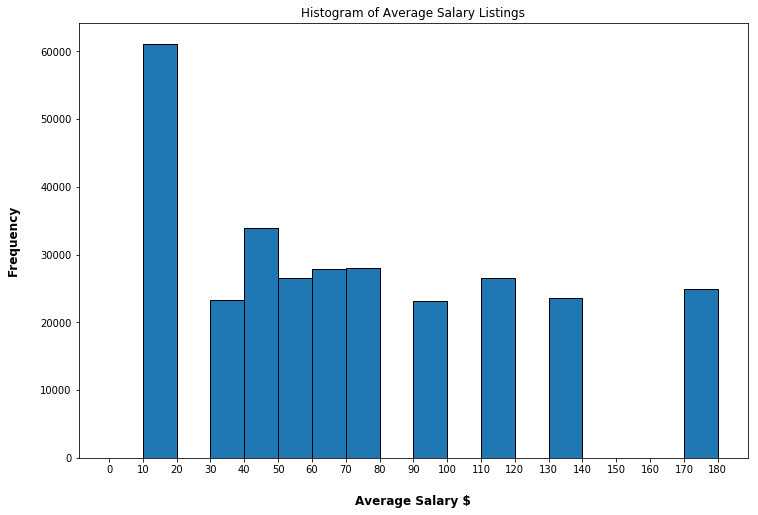

In [16]:
data = df['AverageSalary']
bins = np.arange(0, 181, step=10)
plt.figure(figsize=(12,8))
plt.hist(data, bins, edgecolor="k", alpha=1)
plt.xticks(bins)
plt.xlabel("Average Salary $", labelpad=20, weight='bold', size=12) 
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
plt.title("Histogram of Average Salary Listings")
plt.show()

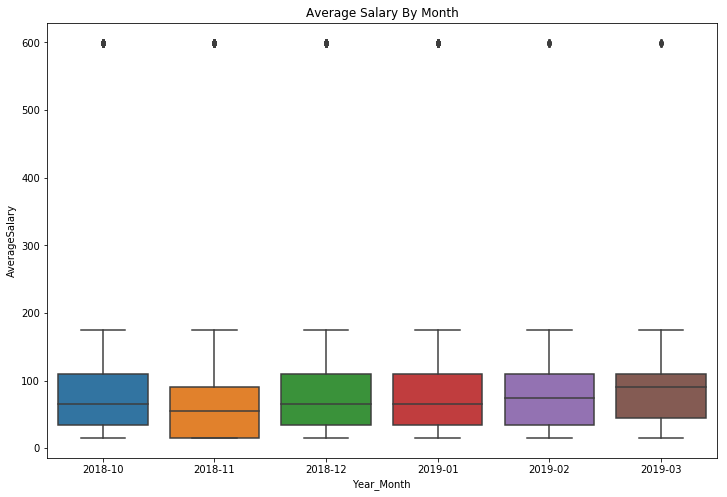

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Year_Month', y='AverageSalary')
plt.title("Average Salary By Month")
plt.show()

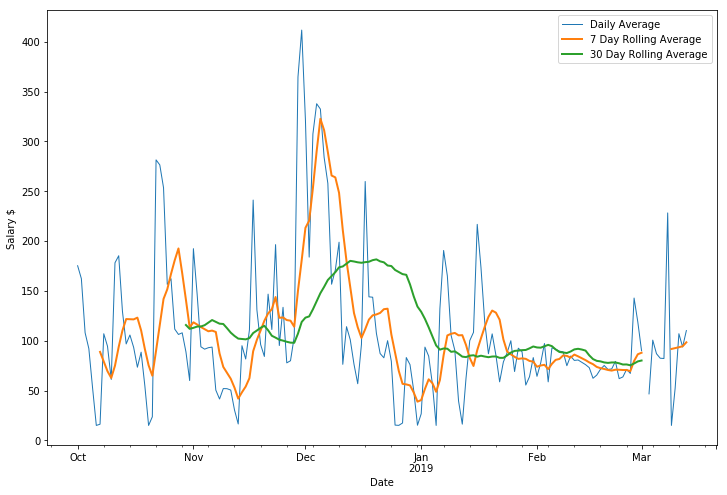

In [18]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').mean()
df_weekly_avg = df_daily_avg.rolling(7).mean()
df_monthly_avg = df_daily_avg.rolling(30).mean()

df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=2)
df_monthly_avg.plot(linewidth=2)
plt.legend(['Daily Average', '7 Day Rolling Average', '30 Day Rolling Average'])

plt.ylabel("Salary $")
plt.show()

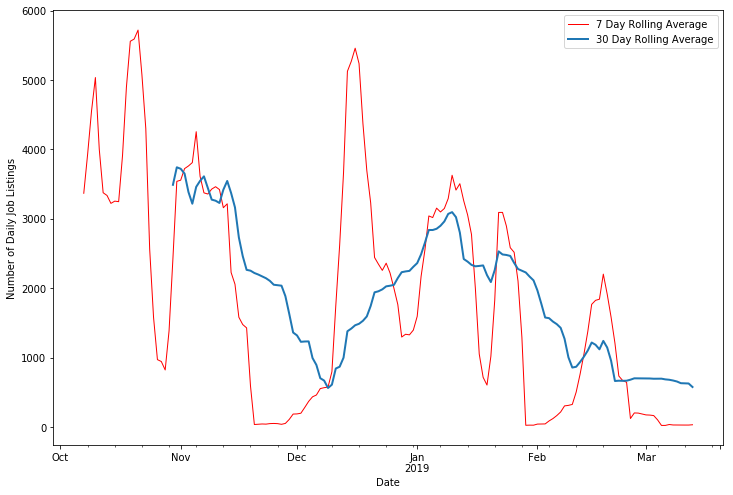

In [19]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').count()
df_weekly_avg = df_daily_avg.rolling(7).mean()
df_monthly_avg = df_daily_avg.rolling(30).mean()

# df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=1, c='red')
df_monthly_avg.plot(linewidth=2)
plt.legend(['7 Day Rolling Average', '30 Day Rolling Average'])

plt.ylabel("Number of Daily Job Listings")
plt.show()

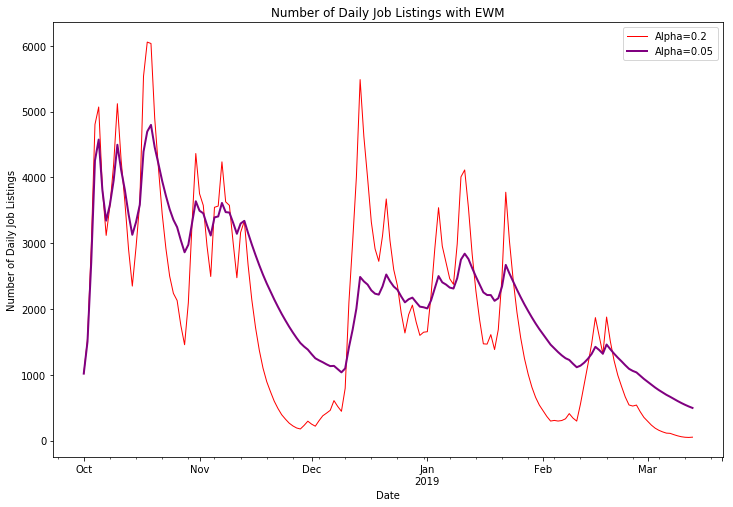

In [44]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').count()
df_weekly_avg = df_daily_avg.ewm(alpha=0.2).mean()
df_monthly_avg = df_daily_avg.ewm(alpha=0.05).mean()

# df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=1, c='red')
df_monthly_avg.plot(linewidth=2, c='purple')
plt.legend(['Alpha=0.2', 'Alpha=0.05'])
plt.title("Number of Daily Job Listings with EWM")

plt.ylabel("Number of Daily Job Listings")
plt.show()

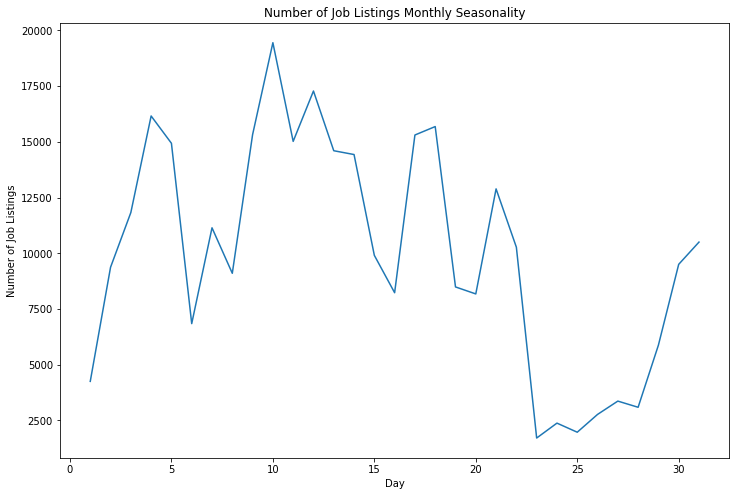

In [21]:
plt.figure(figsize=(12,8))
df.groupby("Day")['AverageSalary'].count().plot()
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Monthly Seasonality")
plt.show()

## 2.2 - Locations

In [22]:
# Group dataset by location and find mean lowest/highest salary + count (for total job listings)
df_location = df.groupby('Location').agg(['mean', 'count'])

Location
Sydney                                  60462
Melbourne                               46483
Brisbane                                21350
Perth                                   13161
Adelaide                                 6611
ACT                                      6207
Newcastle, Maitland & Hunter             3941
Gold Coast                               3581
South West Coast VIC                     1785
Mackay & Coalfields                      1699
Wollongong, Illawarra & South Coast      1650
Port Hedland, Karratha & Pilbara         1648
Sunshine Coast                           1554
Cairns & Far North                       1499
Northern QLD                             1487
Gosford & Central Coast                  1338
Toowoomba & Darling Downs                1308
Darwin                                   1251
Hobart                                   1045
Blue Mountains & Central West             934
Kalgoorlie, Goldfields & Esperance        867
Lismore & Far North Coast

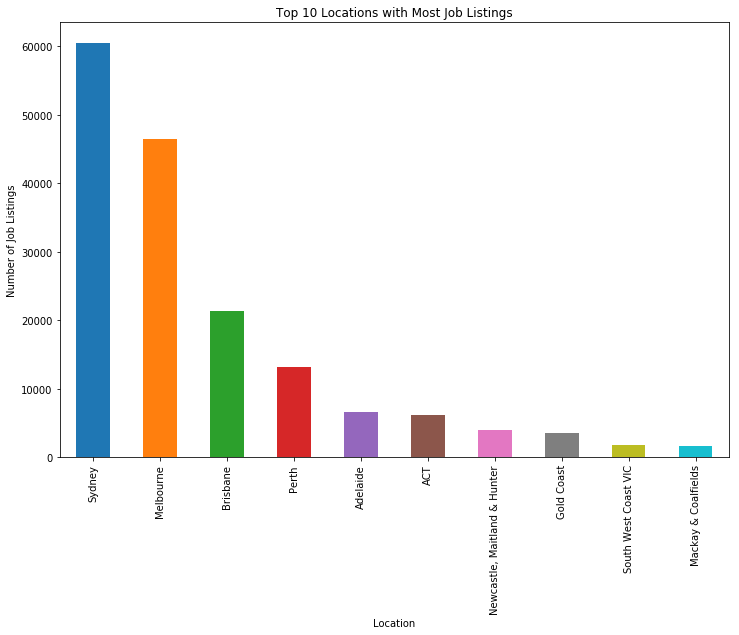

In [70]:
# Count total number of jobs at each location
print(df_location['AverageSalary']['count'].sort_values(ascending=False))
plt.figure(figsize=(12,8))
df_location['AverageSalary']['count'].sort_values(ascending=False).head(10).plot(kind="bar")
plt.ylabel("Number of Job Listings")
plt.title("Top 10 Locations with Most Job Listings")
plt.show()

In [84]:
# Average salary for each location
df_location['AverageSalary']['mean'].sort_values(ascending=False)

Location
ACT                                     142.680119
Port Macquarie & Mid North Coast        110.806624
Sydney                                  103.278687
Geraldton, Gascoyne & Midwest           101.887574
Western QLD                             101.743191
Tumut, Snowy & Monaro                   100.319767
Port Hedland, Karratha & Pilbara         99.532767
Katherine & Northern Australia           97.282609
Kalgoorlie, Goldfields & Esperance       96.062860
Darwin                                   94.444444
Brisbane                                 93.612810
Bundaberg & Wide Bay Burnett             92.924020
Broome & Kimberley                       92.363799
Perth                                    92.067054
Mackay & Coalfields                      91.760447
Dubbo & Central NSW                      91.726135
Far West & North Central NSW             90.089286
Coober Pedy & Outback SA                 89.898148
Mildura & Murray                         89.729642
Rockhampton & Capricor

In [89]:
df_PortHeadland = df.loc[df['Location'] == "Port Hedland, Karratha & Pilbara"]
df_Adelaide_Hills = df.loc[df['Location'] == "Fleurieu Peninsula & Kangaroo Island"]

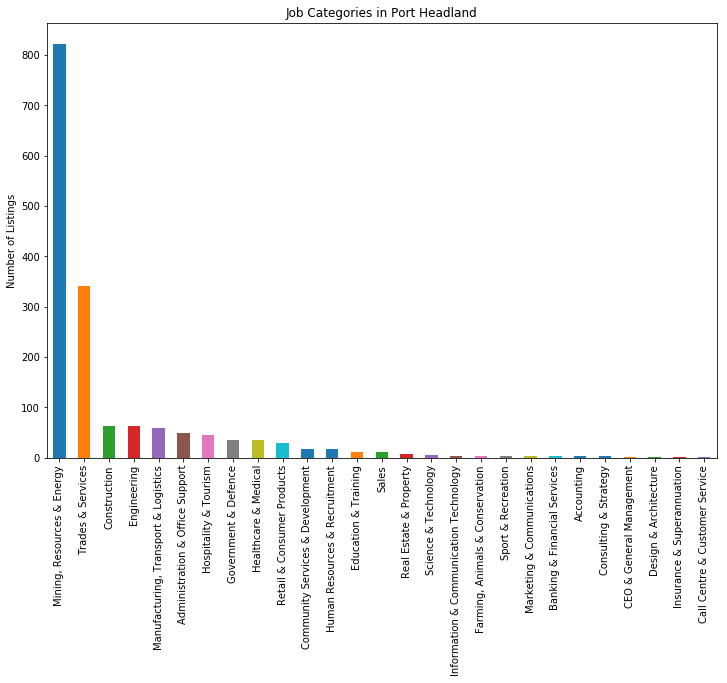

In [90]:
plt.figure(figsize=(12,8))
df_PortHeadland["Classification"].value_counts().plot(kind="bar")
plt.ylabel("Number of Listings")
plt.title("Job Categories in Port Headland")
plt.show()

In [27]:
df_PortHeadland["SubClassification"].value_counts()

Mining - Engineering & Maintenance                 409
Mining - Operations                                216
Other                                               94
Fitters, Turners & Machinists                       67
Automotive Trades                                   54
Electricians                                        48
Welders & Boilermakers                              41
Mining - Drill & Blast                              40
Health, Safety & Environment                        35
Management                                          32
Administrative Assistants                           31
Government - Local                                  30
Labourers                                           26
Mining - Processing                                 25
Technicians                                         22
Retail Assistants                                   21
Plant & Machinery Operators                         20
Foreperson/Supervisors                              19
Mining - E

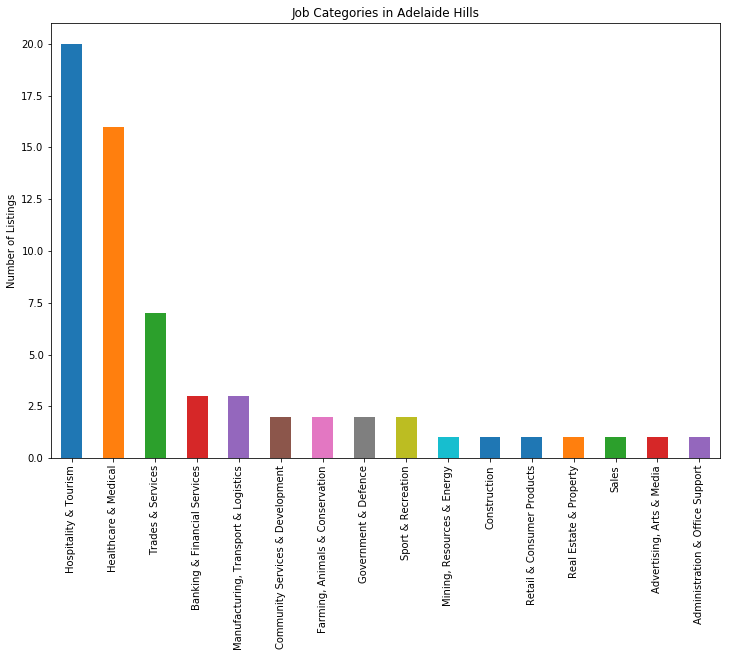

In [78]:
plt.figure(figsize=(12,8))
df_Adelaide_Hills["Classification"].value_counts().plot(kind="bar")
plt.ylabel("Number of Listings")
plt.title("Job Categories in Adelaide Hills")
plt.show()

In [29]:
df_Adelaide_Hills["SubClassification"].value_counts()

Chefs/Cooks                                     9
Other                                           6
Nursing - Aged Care                             6
Banking - Retail/Branch                         3
Bar & Beverage Staff                            3
Waiting Staff                                   2
Cleaning Services                               2
Management                                      2
Automotive Trades                               2
Physiotherapy, OT & Rehabilitation              2
Nursing - Management                            2
Warehousing, Storage & Distribution             1
Management - Store                              1
Air Conditioning & Refrigeration                1
Administrative Assistants                       1
Labourers                                       1
Aged & Disability Support                       1
Coaching & Instruction                          1
Journalism & Writing                            1
Mining - Operations                             1


# 2.3 - Sectors

In [30]:
df_classification = df.groupby('Classification').agg(['mean', 'count'])

Classification
Information & Communication Technology    22715
Trades & Services                         17929
Healthcare & Medical                      17023
Hospitality & Tourism                     15498
Manufacturing, Transport & Logistics      12339
Administration & Office Support            9991
Accounting                                 9348
Education & Training                       9151
Construction                               8349
Sales                                      8092
Retail & Consumer Products                 8010
Government & Defence                       7200
Engineering                                6436
Mining, Resources & Energy                 6269
Banking & Financial Services               4616
Community Services & Development           4464
Legal                                      4227
Human Resources & Recruitment              4121
Marketing & Communications                 3964
Call Centre & Customer Service             3951
Real Estate & Property   

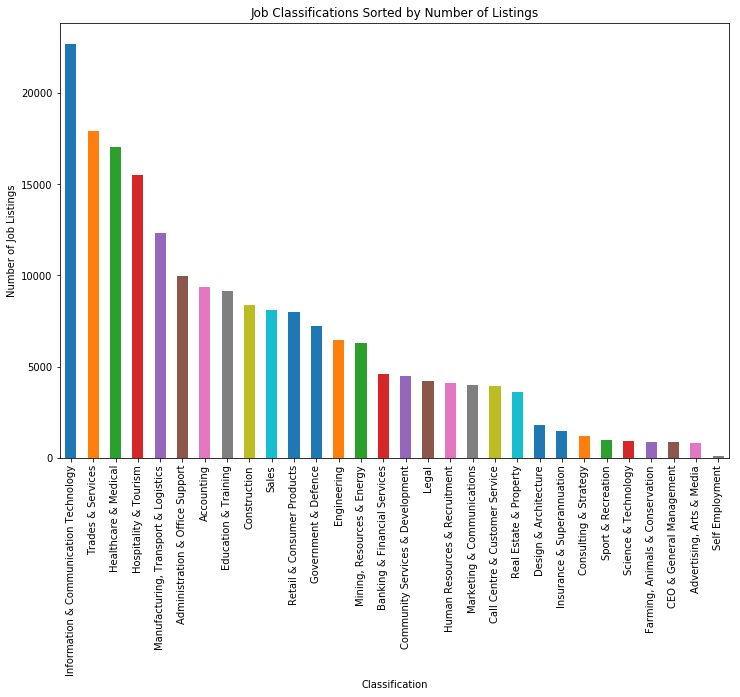

In [31]:
# Count total number of jobs in each sector
classification_count = df_classification['AverageSalary']['count'].sort_values(ascending=False)
print(classification_count)
plt.figure(figsize=(12,8))
classification_count.plot(kind="bar")
plt.ylabel("Number of Job Listings")
plt.title("Job Classifications Sorted by Number of Listings")
plt.show()

Classification
Accounting                                 87.603445
Administration & Office Support            48.608247
Advertising, Arts & Media                  69.095899
Banking & Financial Services              111.079073
CEO & General Management                  255.188095
Call Centre & Customer Service             48.563402
Community Services & Development           58.404346
Construction                              126.522877
Consulting & Strategy                     157.849206
Design & Architecture                      89.162977
Education & Training                       72.327068
Engineering                               121.043583
Farming, Animals & Conservation            57.811578
Government & Defence                      103.776181
Healthcare & Medical                      117.323680
Hospitality & Tourism                      40.228481
Human Resources & Recruitment              89.377214
Information & Communication Technology    182.465573
Insurance & Superannuation     

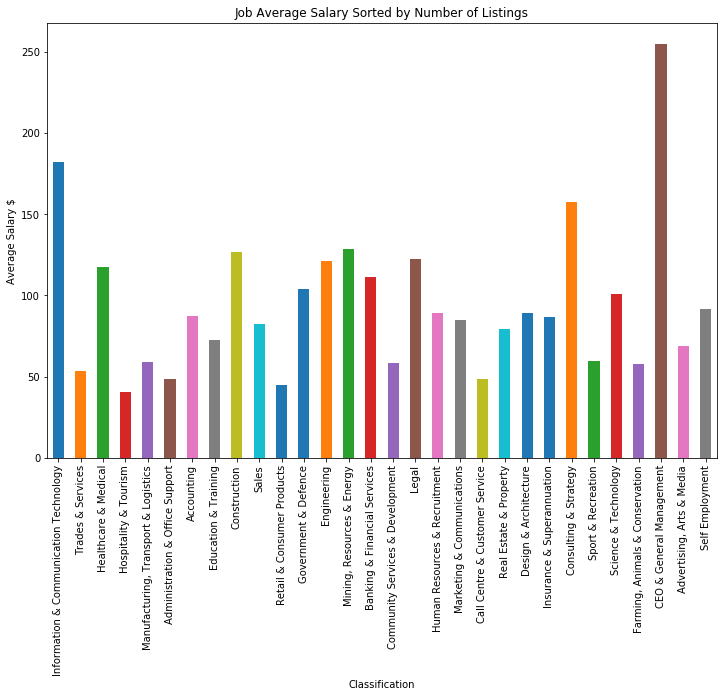

In [91]:
# Average salary for each sector
count_order = df_classification['AverageSalary']['count'].sort_values(ascending=False).iteritems()
print(df_classification['AverageSalary']['mean'])
classification_mean = df_classification['AverageSalary']['mean'][[name for name, count in count_order]]
plt.figure(figsize=(12,8))
classification_mean.plot(kind="bar")
plt.ylabel("Average Salary $")
plt.title("Job Average Salary Sorted by Number of Listings")
plt.show()

In [33]:
df_subclassification = df.groupby('SubClassification').agg(['mean', 'count'])

In [34]:
# Count total number of jobs in each subsector
df_subclassification['AverageSalary']['count'].sort_values(ascending=False)

SubClassification
Other                                    11212
Management                                6221
Chefs/Cooks                               4593
Administrative Assistants                 4562
Developers/Programmers                    4194
Retail Assistants                         3881
Warehousing, Storage & Distribution       3622
Government - State                        3585
Sales Representatives/Consultants         3359
Automotive Trades                         3258
Business/Systems Analysts                 2965
Waiting Staff                             2860
Bar & Beverage Staff                      2585
Programme & Project Management            2407
Project Management                        2392
Childcare & Outside School Hours Care     2380
Mining - Engineering & Maintenance        2165
Nursing - Aged Care                       2114
Customer Service - Call Centre            2074
Management - Store                        2024
Aged & Disability Support                 

In [35]:
# Average salary for each subsector
df_subclassification['AverageSalary']['mean'].sort_values(ascending=False)

SubClassification
General Practitioners                     411.490461
Medical Specialists                       367.765814
COO & MD                                  343.392157
CEO                                       311.245399
Architects                                282.069715
Programme & Project Management            252.184047
General/Business Unit Manager             248.120155
Police & Corrections                      243.220339
Company Secretaries                       237.388889
Corporate Finance & Investment Banking    210.496894
Consultants                               208.146725
Management & Change Consulting            203.609649
Oil & Gas - Drilling                      201.138889
Oil & Gas - Engineering & Maintenance     199.904878
Business/Systems Analysts                 197.525801
Residents & Registrars                    197.221190
Security                                  194.799096
Generalists - In-house                    183.889518
Oil & Gas - Exploration & Ge

In [36]:
df[df['Classification'] == 'CEO & General Management']['SubClassification'].value_counts()

General/Business Unit Manager    516
CEO                              163
Other                             86
COO & MD                          51
Board Appointments                24
Name: SubClassification, dtype: int64

In [37]:
df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()

Developers/Programmers                   4194
Business/Systems Analysts                2965
Programme & Project Management           2407
Architects                               1542
Engineering - Software                   1432
Help Desk & IT Support                   1372
Networks & Systems Administration        1192
Consultants                              1145
Other                                     996
Testing & Quality Assurance               827
Security                                  774
Management                                745
Engineering - Network                     551
Database Development & Administration     548
Web Development & Production              452
Sales - Pre & Post                        446
Product Management & Development          376
Telecommunications                        353
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          96
Computer Operators                

In [38]:
for name, count in classification_count.head(10).iteritems():
    print(name)

Information & Communication Technology
Trades & Services
Healthcare & Medical
Hospitality & Tourism
Manufacturing, Transport & Logistics
Administration & Office Support
Accounting
Education & Training
Construction
Sales


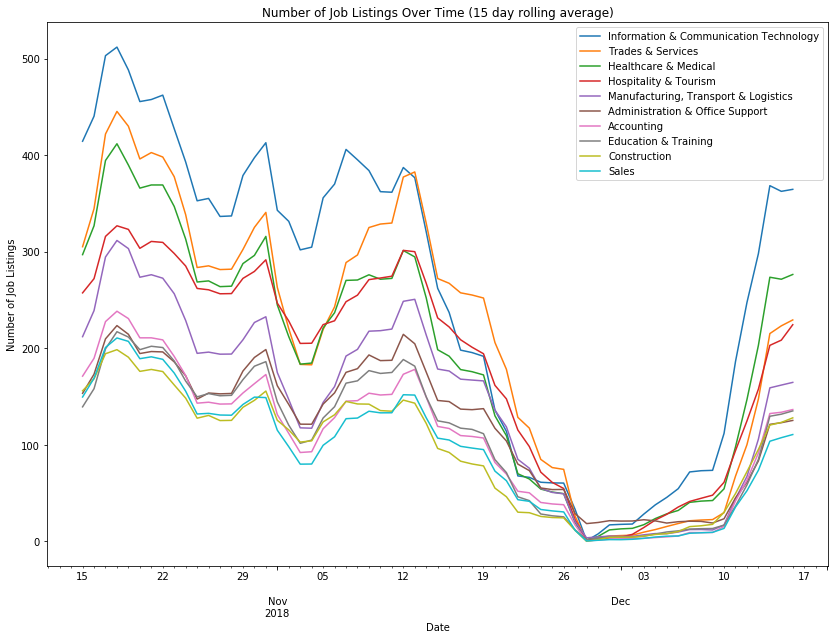

In [133]:
plt.figure(figsize=(14,10))

labels = []

for name, count in classification_count.head(10).iteritems():
    matching_class = df[df['Classification'] == name]
    labels.append(name)
    matching_class['AverageSalary'].resample('D').count().fillna(0).rolling(15).mean().plot()

plt.legend(labels)
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Over Time (15 day rolling average)")
plt.show()

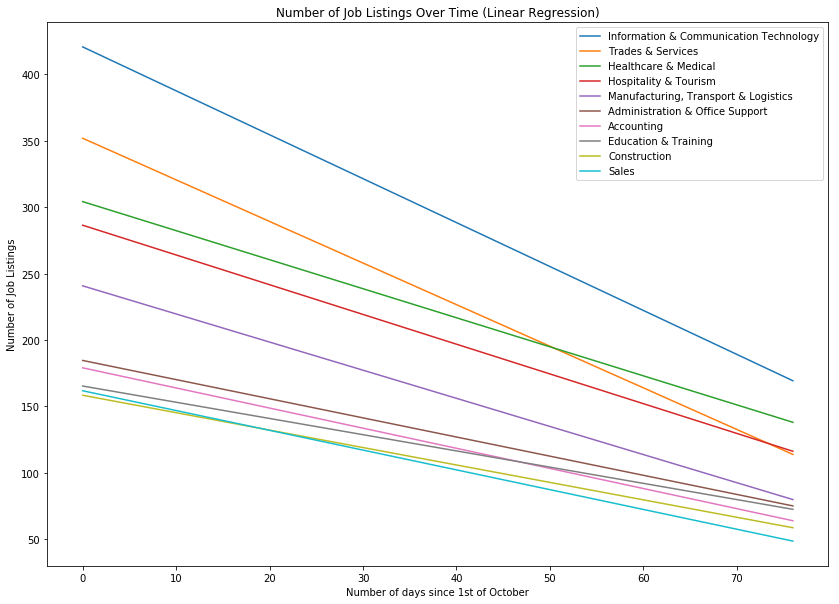

In [142]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(14,10))

labels = []

for name, count in classification_count.head(10).iteritems():
    matching_class = df[df['Classification'] == name]
    labels.append(name)
    graph = matching_class['AverageSalary'].resample('D').count()
    X = np.arange(len(graph.index.values)).reshape(-1, 1)  # values converts it into a numpy array
    Y = graph.fillna(0).values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.plot(X, Y_pred)
    

plt.legend(labels)
plt.xlabel("Number of days since 1st of October")
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Over Time (Linear Regression)")
plt.show()

# 2.4 - Export Interactive Data

In [66]:
import json
set_classification = {"name": "sectors", "children": []}
    
for name, count in classification_count.iteritems():
    subclass = df[df['Classification'] == name]['SubClassification']
    children = []
    for i in subclass.unique():
        children.append({"name": i})
    set_classification['children'].append({"name": name, "children": children})
    
y = json.dumps(set_classification)
print(y)

{"name": "sectors", "children": [{"name": "Information & Communication Technology", "children": [{"name": "Help Desk & IT Support"}, {"name": "Sales - Pre & Post"}, {"name": "Networks & Systems Administration"}, {"name": "Programme & Project Management"}, {"name": "Security"}, {"name": "Consultants"}, {"name": "Architects"}, {"name": "Other"}, {"name": "Business/Systems Analysts"}, {"name": "Developers/Programmers"}, {"name": "Web Development & Production"}, {"name": "Engineering - Software"}, {"name": "Product Management & Development"}, {"name": "Engineering - Network"}, {"name": "Team Leaders"}, {"name": "Testing & Quality Assurance"}, {"name": "Management"}, {"name": "Database Development & Administration"}, {"name": "Telecommunications"}, {"name": "Technical Writing"}, {"name": "Engineering - Hardware"}, {"name": "Computer Operators"}]}, {"name": "Trades & Services", "children": [{"name": "Security Services"}, {"name": "Cleaning Services"}, {"name": "Hair & Beauty Services"}, {"na